### Transferencias a muncipios

El siguiente es un análisis que se realiza sobre un dataset que se encuentra en el portal de datos abiertos de la provincia de Buenos Aires (Argentina), y ademas se cruzan datos con el INDEC(Instituto Nacional de Estadisticas y Censos) y el IGN (Instituto Geografico Nacional).

El dataset principal cuenta con información sobre las transferencias que fueron realizadas desde el estado provincial a los municipios. Se detallan no solo los conceptos de por los que las transferencias fueron realizadas sino tambien el monto y el periodo en el que fueron realizados.

En el mismo se realiza:
    
    -Data cleaning
    
    -EDA
        -Proporción de transferencias por concepto.
        -Evolución de las transferencias (2010-2019).
        -Montos por transferencias a cada municipio.
        
    -Análisis de transferencias y poblacion
        -Busqueda de correlación entre transferencias y proporción de habitantes.
        -Calculo de transferencias percapita por municipio.
        
Datasets utilizados:

-Provincia de Buenos Aires: https://catalogo.datos.gba.gob.ar/dataset/transferencias-municipios/archivo/cb1a8783-0e81-4b66-91aa-0a7e6b4aa639

-IGN: https://www.ign.gob.ar/NuestrasActividades/InformacionGeoespacial/CapasSIG#mapaOficial

-INDEC: https://www.indec.gob.ar/ftp/censos/2010/CuadrosDefinitivos/P1-P_Buenos_Aires.xls

#### Realizado por Manuel Sabini

GitHub:https://github.com/ManuelSabini

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from mpl_toolkits.basemap import Basemap

In [2]:
transferencias_municipios = pd.read_csv(r"transferencias-municipios-ene2010_ago2019.csv")
transferencias_municipios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139112 entries, 0 to 139111
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   anio              139112 non-null  int64  
 1   mes               139112 non-null  int64  
 2   municipio_id      139112 non-null  int64  
 3   municipio_nombre  139112 non-null  object 
 4   concepto          139112 non-null  object 
 5   monto             139112 non-null  float64
 6   Unnamed: 6        0 non-null       float64
dtypes: float64(2), int64(3), object(2)
memory usage: 7.4+ MB


In [3]:
print("El dataset cuenta con " + str(np.shape(transferencias_municipios)[1]) + " columnas y " + str(np.shape(transferencias_municipios)[0]) + " filas")

El dataset cuenta con 7 columnas y 139112 filas


In [4]:
transferencias_municipios.head()

,anio,mes,municipio_id,municipio_nombre,concepto,monto,Unnamed: 6
0,2010,1,60007,Adolfo Alsina,Coparticipación Bruta,1968850.7,NaN
1,2010,1,60007,Adolfo Alsina,Descentralización Tributaria,110249.6,NaN
2,2010,1,60007,Adolfo Alsina,Fondo Solidario Provincial,72045.5,NaN
3,2010,1,60007,Adolfo Alsina,Fondo Fortalecimiento Programas Sociales,24061.6,NaN
4,2010,1,60007,Adolfo Alsina,Fondo Fortalecimiento Recursos Municipales,115305.8,NaN


In [5]:
transferencias_municipios=transferencias_municipios.drop(["Unnamed: 6"], axis=1)
transferencias_municipios.isnull().sum()

anio                0
mes                 0
municipio_id        0
municipio_nombre    0
concepto            0
monto               0
dtype: int64

In [6]:
columns_df = transferencias_municipios.columns
for i in range(5):
        print('La columna '+ str(columns_df[i])+' tiene '+ str(len(transferencias_municipios[columns_df[i]].unique()))+' valores distintos')
        print('Los valores son: \n'+str(transferencias_municipios[columns_df[i]].unique())+'\n')

La columna anio tiene 10 valores distintos
Los valores son: 
[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]

La columna mes tiene 12 valores distintos
Los valores son: 
[ 1  2  3  4  5  6  7  8  9 10 11 12]

La columna municipio_id tiene 135 valores distintos
Los valores son: 
[60007 60014 60021 60028 60077 60035 60042 60049 60056 60063 60070 60084
 60091 60098 60105 60112 60119 60126 60134 60140 60147 60154 60161 60168
 60210 60218 60224 60182 60175 60189 60196 60203 60231 60238 60245 60252
 60260 60266 60270 60274 60277 60280 60287 60294 60301 60308 60315 60322
 60329 60336 60343 60351 60357 60364 60371 60385 60392 60399 60406 60408
 60410 60412 60413 60420 60427 60441 60434 60448 60455 60462 60469 60476
 60483 60490 60497 60505 60511 60515 60518 60525 60532 60539 60547 60553
 60560 60568 60574 60581 60588 60595 60602 60609 60616 60623 60630 60638
 60644 60648 60651 60655 60658 60665 60672 60679 60686 60693 60700 60707
 60721 60714 60728 60735 60742 60749 60756 60760 60763 60770

In [7]:
montos_x_part = pd.pivot_table(transferencias_municipios, values = 'monto', columns="anio", index = 'municipio_nombre', aggfunc = np.sum)
montos_x_concept = pd.pivot_table(transferencias_municipios, values = 'monto', columns="anio", index = 'concepto', aggfunc = np.sum)

In [8]:
montos_x_concept = pd.pivot_table(transferencias_municipios, values = 'monto', index = 'concepto', aggfunc = np.sum)

In [9]:
suma=sum(montos_x_concept["monto"])
for i in range(len(montos_x_concept["monto"].unique())):
    print(str(montos_x_concept.index[i]) + " ---> " + str(montos_x_concept["monto"][i]*100/suma) +" %")


Ajuste Coparticipación 2015 ---> 0.028363340745264205 %
Coparticipación Bruta ---> 72.12064324234825 %
Descentralización ---> 0.6039306115219605 %
Descentralización Tributaria ---> 2.5727055499596623 %
Fondo Compensador Decreto PEN 836/18 ---> 0.11309641103007617 %
Fondo Financiamiento Educativo ---> 7.313408752137771 %
Fondo Fortalecimiento Programas Sociales ---> 1.5975457474035994 %
Fondo Fortalecimiento Recursos Municipales ---> 4.184799560708018 %
Fondo Fortalecimiento Servicios Municipales ---> 0.12482071501630232 %
Fondo Fortalecimiento de la Seguridad y Otros Servicios Asociados ---> 0.7260827900052438 %
Fondo Infraestructura Municipal ---> 1.27751823823741 %
Fondo Infraestructura Municipal 2016 ---> 0.05422066326867944 %
Fondo Infraestructura Municipal 2017 ---> 1.8931469626804036 %
Fondo Ley 14890 ---> 0.04830958731399899 %
Fondo Municipal Inclusión Social ---> 3.1222561336777046 %
Fondo Solidario Provincial ---> 1.840569491253853 %
Fondos Saneamiento Ambiental ---> 0.5627080

<Figure size 1440x576 with 0 Axes>

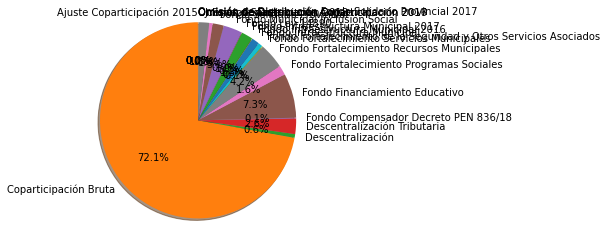

In [10]:
size=list(montos_x_concept["monto"])
labels=list(montos_x_concept.index)
plt.figure(figsize = (20,8))
fig1, ax1 = plt.subplots()
ax1.pie(size, labels=labels, autopct="%1.1f%%", shadow="True", startangle=90)
ax1.axis("Equal")
plt.show()

En el grafico de torta observamos que el principal concepto de transferencias en la coparticipación bruta, seguido por el fondo financiero educativo.

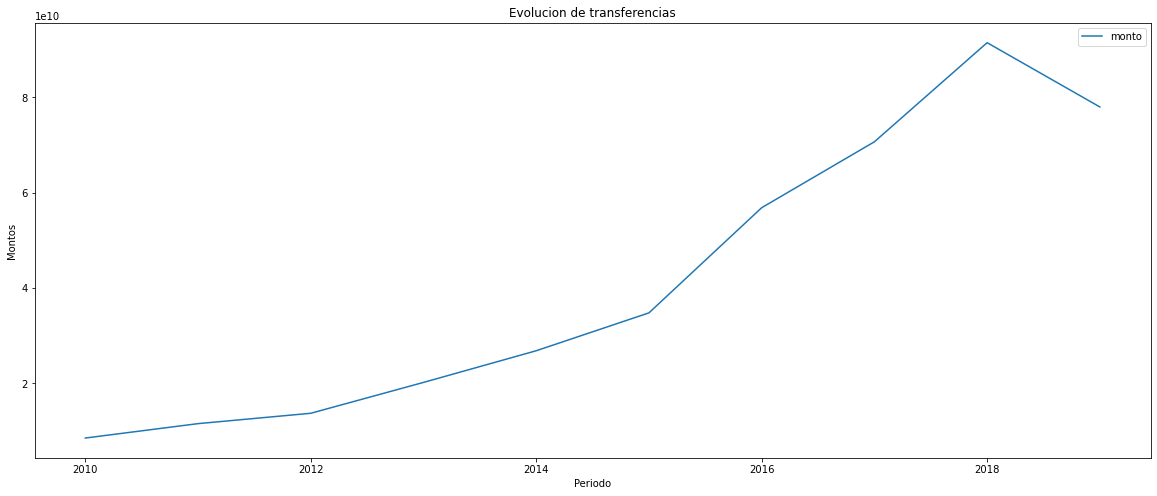

In [11]:
transferencias_anio = pd.pivot_table(transferencias_municipios, values="monto", index="anio", aggfunc=np.sum)

plt.figure(figsize = (20,8))

sns.lineplot(data=transferencias_anio)

plt.title("Evolucion de transferencias")
plt.ylabel("Montos") 
plt.xlabel("Periodo")

plt.show()

En el grafico queda en evidencia el aumento de las transferencias en terminos monetarios que se realizan a los municipios, principalmente este aumento se debe al aumento de la inflacion.

#### Ahora vamos a cruzar datos tanto poblacionales como geograficos para hacer un analisis de las transferencias en terminos percapita a cada partido. 

Para eso importamos los dataset del INDEC y el IGN

In [12]:
#lectura de el dataset de localidades del Instituto geografico nacional
localidades=pd.read_csv(r"localidad_bahra.csv", index_col="gid")
localidades.drop(localidades[localidades["cod_depto"]!="Buenos Aires"].index, inplace=True)
localidades.drop_duplicates("nom_depto", inplace=True)

#Creacion  de nuevo DF para quedarme solo con un par de columnas
localidad=pd.DataFrame({"Partido" : pd.Series(localidades["nom_depto"],dtype=str),
                          "Latitud" : pd.Series(localidades["lat_gd"],dtype=float),
                          "Longitud" : pd.Series(localidades["long_gd"], dtype=float),
                         })
#Remplazo de Nombres de localidad porque estan escritos distintos en los dataset
localidad=localidad.replace({"General La Madrid" : "General la Madrid",
                               "General Las Heras" : "General las Heras"})


#Cambio de indice para unir tablas
localidad.set_index("Partido", inplace=True)

In [13]:
#Armado de dataframe del indec sobre poblacion
poblacion=pd.read_excel(r"P1-P_Buenos_Aires.xls", sheet_name="P1buenosaires", header=4, skiprows=3, names=["Localidad", "Poblacion 2001", "Poblacion 2010", "Variacion Absoluta", "Variacion Relativa"])
poblacion=poblacion.dropna()
poblacion.drop(["Poblacion 2001", "Variacion Absoluta", "Variacion Relativa"],axis=1, inplace=True)

#Remplazo de nombre de partidos debido a diferencias entre las tablas
poblacion=poblacion.replace({"General La Madrid" : "General la Madrid",
                   "General Las Heras" : "General las Heras"
                })

#Cambio de key para unir tablas
poblacion.set_index("Localidad", inplace=True)

#Union de tablas
df2=[montos_x_part, poblacion, localidad]
montos_y_poblacion=pd.concat(df2, axis=1)
montos_y_poblacion.fillna({"Poblacion 2010" : 8647}, inplace=True)
montos_y_poblacion

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Poblacion 2010,Latitud,Longitud
25 de Mayo,38969710.8,51487554.6,61808929.1,88536331.5,116698417.9,151349280.1,239914089.7,3.008354e+08,3.890366e+08,3.293023e+08,35842.0,-35.740317,-60.557071
9 de Julio,39238333.9,52276785.5,61973238.9,88003645.2,113061821.4,147668581.4,236305050.2,2.924715e+08,3.919817e+08,3.302780e+08,47722.0,-35.292355,-61.405805
Adolfo Alsina,35794327.3,50780461.3,58813554.9,84473717.5,108867639.7,144236616.2,234833589.1,2.867598e+08,3.756343e+08,3.112536e+08,17072.0,-37.179483,-62.759990
Adolfo Gonzales Chaves,25548598.6,32637827.4,39858175.2,57864053.4,74093355.6,93129059.5,151840712.7,1.890665e+08,2.495790e+08,2.029203e+08,12047.0,-38.032371,-60.099392
Alberti,11923308.7,16062190.8,20891468.6,29717303.6,41726563.8,54276525.4,85118830.6,1.124022e+08,1.492962e+08,1.228395e+08,10654.0,-35.031575,-60.280286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tres de Febrero,99681891.4,137553403.2,159085794.1,232599637.0,304285827.0,391452225.6,644448796.7,7.681898e+08,1.066690e+09,8.891292e+08,340071.0,-34.603529,-58.563192
Vicente López,129380107.1,177610935.4,207040085.3,309404433.8,410335719.7,536665463.2,893338644.3,1.188999e+09,1.488612e+09,1.304223e+09,269420.0,-34.508944,-58.486155
Villa Gesell,36978725.6,49625790.6,58002920.1,89002371.3,123751337.7,160922725.9,255754702.1,3.443530e+08,4.118154e+08,3.346702e+08,31730.0,-37.338519,-57.033317
Villarino,47982129.4,68126602.7,80991337.8,120052193.5,160536148.1,205710898.0,333285212.8,4.022419e+08,5.429415e+08,4.467563e+08,31014.0,-38.770236,-62.602955


### ¿A que partidos fueron la mayor cantidad de transferencias?

<function matplotlib.pyplot.show(*args, **kw)>

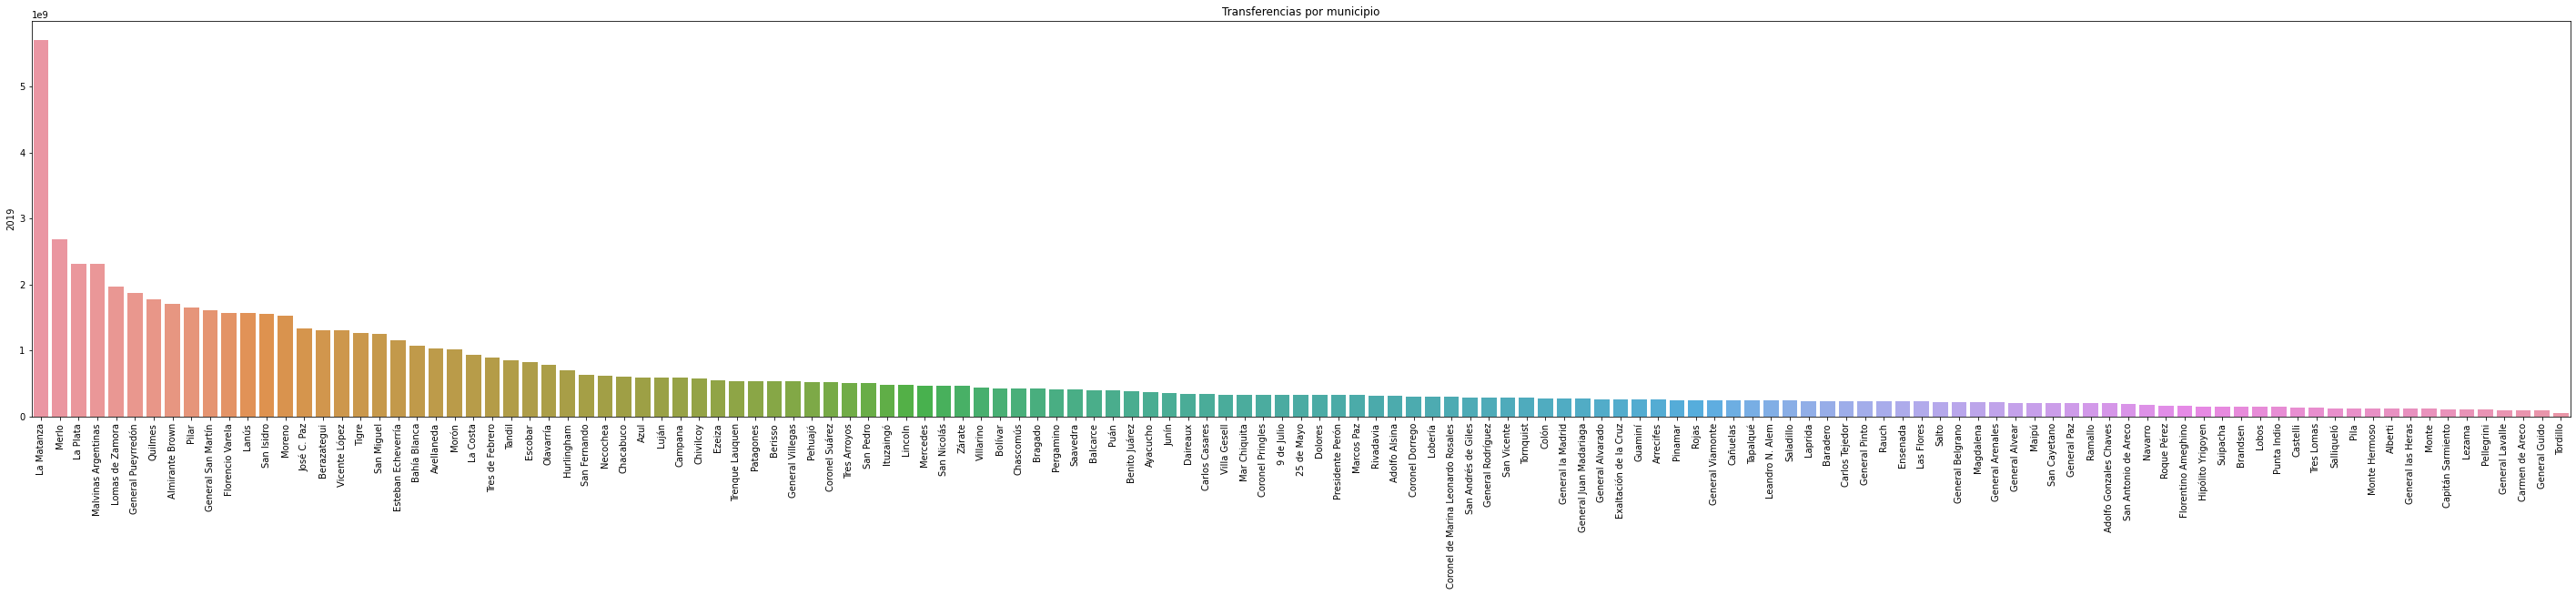

In [14]:
plt.figure(figsize = (50,8))
sns.barplot(x=montos_y_poblacion.index , y=montos_y_poblacion[2019], data = montos_y_poblacion, order=montos_y_poblacion.sort_values(2019,ascending=False).index)

plt.xticks(rotation=90)
plt.title("Transferencias por municipio")
plt.show

La mayor cantidad de transferencias fueron realizadas a los partidos mas poblados de la provincia, estando en el podio el partido de La Matanza, Merlo y La Plata, esta última siendo la capital provincial.

#### Pero ¿Existe correlacion entre los montos distribuidos y la poblacion en dichos partidos?

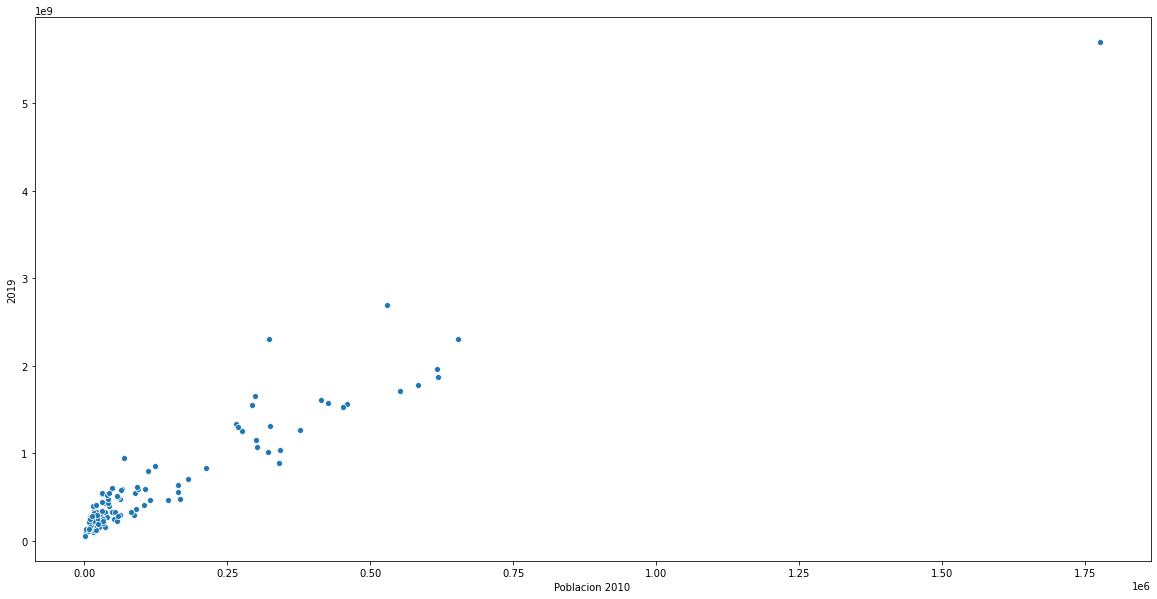

In [15]:
plt.figure(figsize = (20,10))
sns.scatterplot(x="Poblacion 2010", y=2019, data=montos_y_poblacion)

In [16]:
#Correlacion de Pearson
print("Correlación de Pearson: ", montos_y_poblacion[2019].corr(montos_y_poblacion["Poblacion 2010"], method="pearson"))

Correlación de Pearson:  0.96232848309967


Como podemos ver, pareciera ser que hay una correlacion marcada entre la cantidad de habitantes de un municipio y las transferencias que se envian a cada partido.

#### Ahora analizamos las transferencias en terminos percapita, osea dividiendo la cantidad de transferencias que se realizan a cada partido por la cantidad de habitantes del mismo.

In [17]:
def percapita(coparticipacion, poblacion):
    return coparticipacion/poblacion

for i in range(2010,2020):
    coparticipacion = montos_y_poblacion[i]
    poblacion = montos_y_poblacion["Poblacion 2010"]
    montos_y_poblacion[i]=percapita(coparticipacion, poblacion)

In [18]:
montos_y_poblacion

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Poblacion 2010,Latitud,Longitud
25 de Mayo,1087.263847,1436.514553,1724.483263,2470.183904,3255.912558,4222.679541,6693.657991,8393.376634,10854.210758,9187.610581,35842.0,-35.740317,-60.557071
9 de Julio,822.227356,1095.444145,1298.630378,1844.089627,2369.176091,3094.350224,4951.700478,6128.652374,8213.856573,6920.875502,47722.0,-35.292355,-61.405805
Adolfo Alsina,2096.668656,2974.488127,3445.030160,4948.085608,6376.970460,8448.724004,13755.482023,16797.084729,22002.948155,18231.816470,17072.0,-37.179483,-62.759990
Adolfo Gonzales Chaves,2120.743637,2709.207886,3308.556089,4803.191948,6150.357400,7730.477256,12604.026953,15694.071337,20717.110559,16844.051853,12047.0,-38.032371,-60.099392
Alberti,1119.139168,1507.620687,1960.903754,2789.309518,3916.516219,5094.473944,7989.377755,10550.235273,14013.156927,11529.896377,10654.0,-35.031575,-60.280286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tres de Febrero,293.120823,404.484367,467.801706,683.973750,894.771465,1151.089701,1895.041908,2258.909975,3136.668026,2614.539790,340071.0,-34.603529,-58.563192
Vicente López,480.217159,659.234412,768.465909,1148.409301,1523.033627,1991.928822,3315.784442,4413.181618,5525.248426,4840.853282,269420.0,-34.508944,-58.486155
Villa Gesell,1165.418393,1564.002225,1828.015131,2804.991217,3900.136707,5071.627038,8060.343590,10852.600435,12978.739370,10547.436996,31730.0,-37.338519,-57.033317
Villarino,1547.111930,2196.640314,2611.444438,3870.903253,5176.247762,6632.839943,10746.282737,12969.687718,17506.336209,14404.988034,31014.0,-38.770236,-62.602955


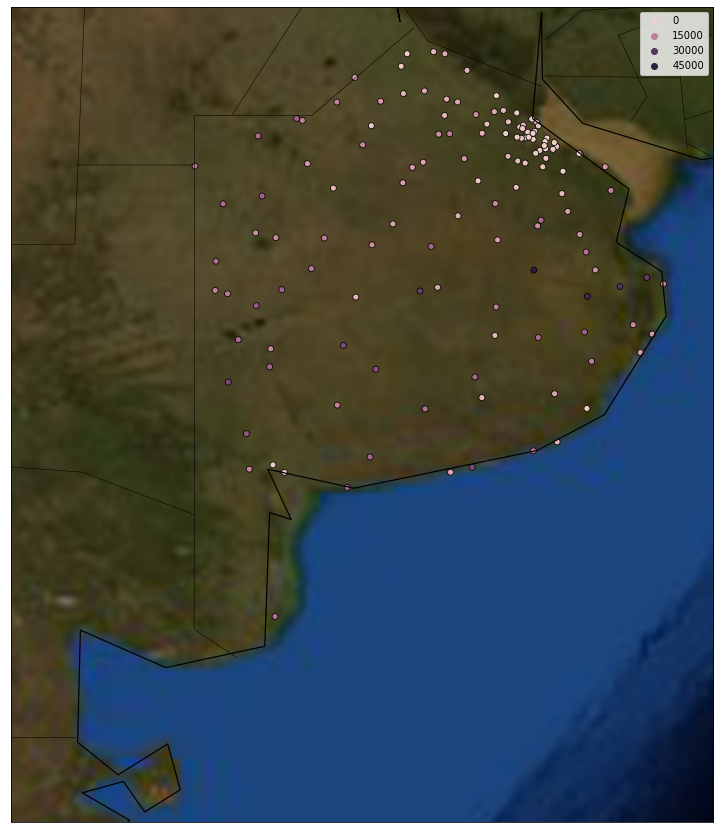

In [19]:
lats = montos_y_poblacion["Latitud"].values.tolist()
lons = montos_y_poblacion["Longitud"].values.tolist()
copart_percapita = montos_y_poblacion[2019].values.tolist()

fig = plt.gcf()
fig.set_size_inches(20, 15)

m = Basemap(projection='mill', \
            llcrnrlat=-43, urcrnrlat=-33, \
            llcrnrlon=-66, urcrnrlon=-56, \
            lat_ts=10, \
            resolution="c"   )

  
m.drawcoastlines(color='black', linewidth=1.2) 
#m.drawcountries(color='black', linewidth=1.5)
m.drawstates()
x, y = m(lons,lats)


sns.scatterplot(x, y, hue=copart_percapita, edgecolor="Black") 
m.bluemarble(scale=2)

plt.show()

En el mapa podemos ver que en terminos percapita las personas que viven en el interior de la provincia reciben transferencias muy superiores para gastar en sus habitantes.

<function matplotlib.pyplot.show(*args, **kw)>

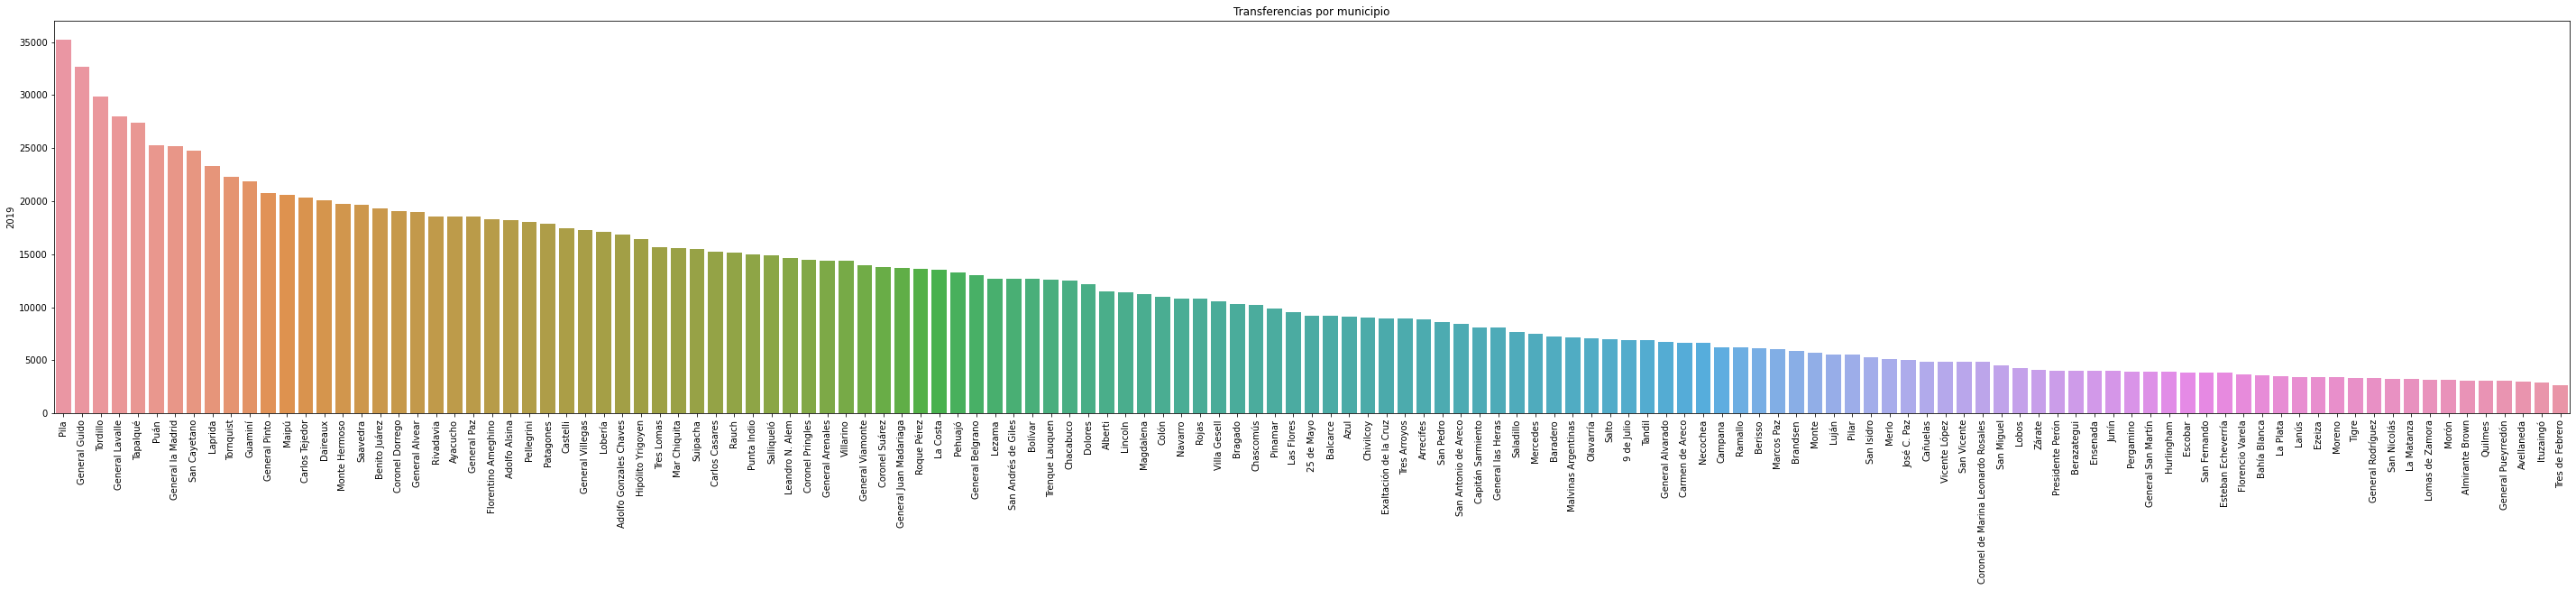

In [20]:

plt.figure(figsize = (50,8))
sns.barplot(x=montos_y_poblacion.index , y=montos_y_poblacion[2019], data = montos_y_poblacion, order=montos_y_poblacion.sort_values(2019,ascending=False).index
)

plt.xticks(rotation=90)
plt.title("Transferencias por municipio")
plt.show

Podemos ver que el nuevo podio esta compuesto por los partidos de Pila, General Guido y Tordillo. Y que los partidos de La Matanza, Merlo y La Plata quedaron en los ultimos 40 lugares de 135. En algunos de los partidos del GBA la transferencias por coparticipacion en el año 2019 fueron inferiores a los 5000 pesos por habitante, mientras que en otros municipios en el interior de la provincia incluso se llego a mas de 35000 pesos por habitante.

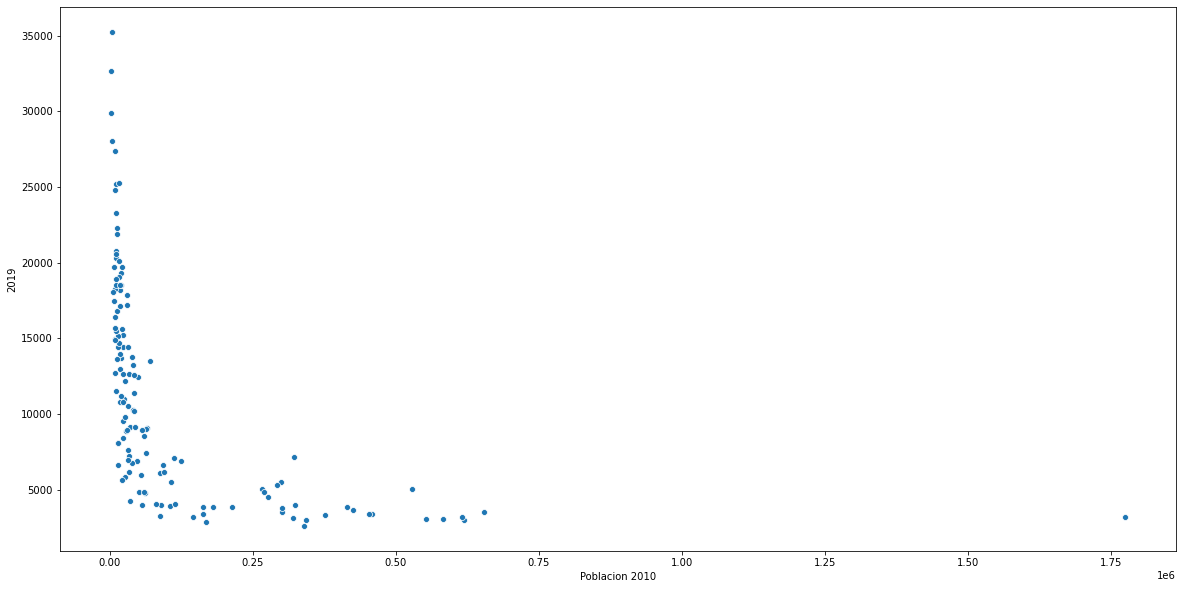

In [21]:
plt.figure(figsize = (20,10))
sns.scatterplot(x="Poblacion 2010", y=2019, data=montos_y_poblacion)

In [22]:
#Correlacion de Pearson
print("Correlación de Pearson: ", montos_y_poblacion[2019].corr(montos_y_poblacion["Poblacion 2010"], method="pearson"))

Correlación de Pearson:  -0.47975310583213104


Al calcular el coeficiente de correlación de Pearson encontramos que en esta oportunidad nos da una correlación inversa debil, osea que cuanto menor cantidad de habitantes tienen el municipio mayor es la transferencia percapita, eso lo podemos visualizar en el scatterplot. el indice de correlacion nos indica una correlacion debil, eso es debido a que la correlacion no se ajusta a una funcion lineal, eso se puede ver claramente en el scatterplot.